In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
city = 'cali'

In [3]:
series1 = pd.read_csv( './data/agents/clean/{}-actual.csv'.format( city ) )
series2 = pd.read_csv( './data/agents/clean/{}-no-cuarentena.csv'.format( city ) )
series3 = pd.read_csv( './data/agents/clean/{}-apertura-30.csv'.format( city ) )
series4 = pd.read_csv( './data/agents/clean/{}-apertura-50.csv'.format( city ) )
series5 = pd.read_csv( './data/agents/clean/{}-apertura-100.csv'.format( city ) )

In [4]:
series1[ 'Fecha' ] = pd.to_datetime( series1[ 'Fecha' ] )
series2[ 'Fecha' ] = pd.to_datetime( series2[ 'Fecha' ] )
series3[ 'Fecha' ] = pd.to_datetime( series3[ 'Fecha' ] )
series4[ 'Fecha' ] = pd.to_datetime( series4[ 'Fecha' ] )
series5[ 'Fecha' ] = pd.to_datetime( series5[ 'Fecha' ] )

In [5]:
series1.head()

,exp,Fecha,Graves,Críticos,Fallecidos,R0,Rt,Cuarentena
0,0,2020-03-06,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0,2020-03-07,0.0,0.0,0.0,0.000054,0.076923,0.0
2,0,2020-03-08,0.0,0.0,0.0,0.000214,0.213115,0.0
3,0,2020-03-09,0.0,0.0,0.0,0.000508,0.323944,0.0
4,0,2020-03-10,0.0,0.0,0.0,0.000669,0.392405,0.0


In [6]:
def ci( x ):
    try:
        return 1.96 * np.std( x ) / np.sqrt( len( x ) )
    except ZeroDivisionError:
        return 0

In [7]:
series1_grouped = series1.groupby( 'Fecha' ).agg( { 'Graves': [ 'mean', ci ], 'Críticos': [ 'mean', ci ], 'Fallecidos': [ 'mean', ci ], 'R0': [ 'mean', ci ], 'Rt': [ 'mean', ci ], 'Cuarentena': [ 'mean' ] } )
series1_grouped.columns = [ '_'.join( col ).strip() for col in series1_grouped.columns.values ]

In [8]:
series2_grouped = series2.groupby( 'Fecha' ).agg( { 'Graves': [ 'mean', ci ], 'Críticos': [ 'mean', ci ], 'Fallecidos': [ 'mean', ci ], 'R0': [ 'mean', ci ], 'Rt': [ 'mean', ci ], 'Cuarentena': [ 'mean' ] } )
series2_grouped.columns = [ '_'.join( col ).strip() for col in series2_grouped.columns.values ]

In [13]:
series3_grouped = series3.groupby( 'Fecha' ).agg( { 'Graves': [ 'mean', ci ], 'Críticos': [ 'mean', ci ], 'Fallecidos': [ 'mean', ci ], 'R0': [ 'mean', ci ], 'Rt': [ 'mean', ci ], 'Cuarentena': [ 'mean' ] } )
series3_grouped.columns = [ '_'.join( col ).strip() for col in series3_grouped.columns.values ]

In [14]:
series4_grouped = series4.groupby( 'Fecha' ).agg( { 'Graves': [ 'mean', ci ], 'Críticos': [ 'mean', ci ], 'Fallecidos': [ 'mean', ci ], 'R0': [ 'mean', ci ], 'Rt': [ 'mean', ci ], 'Cuarentena': [ 'mean' ] } )
series4_grouped.columns = [ '_'.join( col ).strip() for col in series4_grouped.columns.values ]

In [9]:
series5_grouped = series5.groupby( 'Fecha' ).agg( { 'Graves': [ 'mean', ci ], 'Críticos': [ 'mean', ci ], 'Fallecidos': [ 'mean', ci ], 'R0': [ 'mean', ci ], 'Rt': [ 'mean', ci ], 'Cuarentena': [ 'mean' ] } )
series5_grouped.columns = [ '_'.join( col ).strip() for col in series5_grouped.columns.values ]

In [10]:
series1_grouped.tail()

,Graves_mean,Graves_ci,Críticos_mean,Críticos_ci,Fallecidos_mean,Fallecidos_ci,R0_mean,R0_ci,Rt_mean,Rt_ci,Cuarentena_mean
Fecha,,,,,,,,,,,
2020-12-26,0.000198,0.000049,0.000033,0.000014,0.000960,0.000064,0.273636,0.013066,0.450700,0.020492,0.000202
2020-12-27,0.000205,0.000053,0.000030,0.000012,0.000961,0.000064,0.273909,0.013088,0.457731,0.019024,0.000199
2020-12-28,0.000199,0.000052,0.000028,0.000012,0.000963,0.000064,0.274229,0.013119,0.455725,0.020196,0.000194
2020-12-29,0.000186,0.000048,0.000032,0.000013,0.000964,0.000064,0.274476,0.013130,0.459243,0.019357,0.000187
2020-12-30,0.000171,0.000046,0.000032,0.000011,0.000965,0.000064,0.274731,0.013148,0.459789,0.019708,0.000171


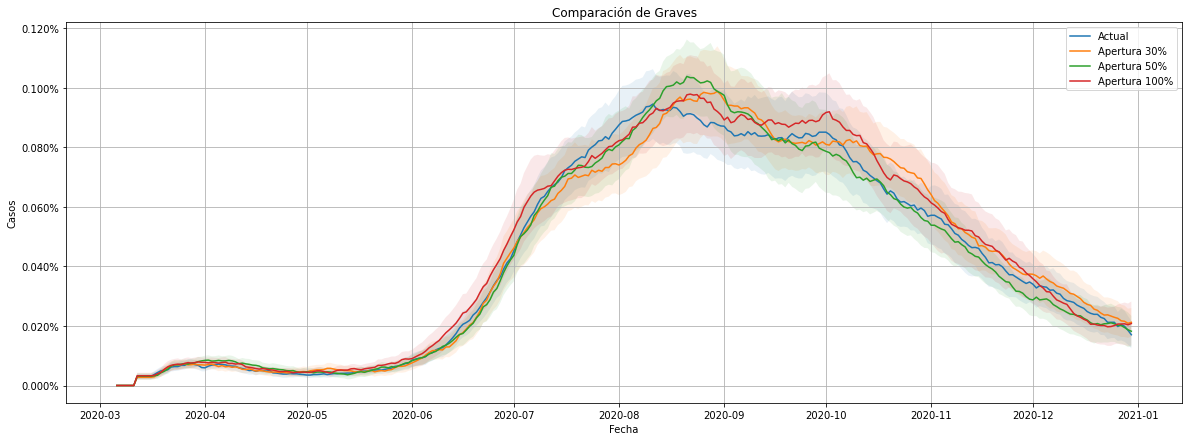

In [29]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( series1_grouped.index, series1_grouped[ 'Graves_mean' ], label = 'Actual' )
ax.fill_between( series1_grouped.index, ( series1_grouped[ 'Graves_mean' ] - series1_grouped[ 'Graves_ci' ] ), ( series1_grouped[ 'Graves_mean' ] + series1_grouped[ 'Graves_ci' ] ), alpha = .1 )

#ax.plot( series2_grouped.index, series2_grouped[ 'Graves_mean' ], label = 'Sin cuarentena' )
#ax.fill_between( series2_grouped.index, ( series2_grouped[ 'Graves_mean' ] - series2_grouped[ 'Graves_ci' ] ), ( series2_grouped[ 'Graves_mean' ] + series2_grouped[ 'Graves_ci' ] ), alpha = .1 )

ax.plot( series3_grouped.index, series3_grouped[ 'Graves_mean' ], label = 'Apertura 30%' )
ax.fill_between( series3_grouped.index, ( series3_grouped[ 'Graves_mean' ] - series3_grouped[ 'Graves_ci' ] ), ( series3_grouped[ 'Graves_mean' ] + series3_grouped[ 'Graves_ci' ] ), alpha = .1 )

ax.plot( series4_grouped.index, series4_grouped[ 'Graves_mean' ], label = 'Apertura 50%' )
ax.fill_between( series4_grouped.index, ( series4_grouped[ 'Graves_mean' ] - series4_grouped[ 'Graves_ci' ] ), ( series4_grouped[ 'Graves_mean' ] + series4_grouped[ 'Graves_ci' ] ), alpha = .1 )

ax.plot( series5_grouped.index, series5_grouped[ 'Graves_mean' ], label = 'Apertura 100%' )
ax.fill_between( series5_grouped.index, ( series5_grouped[ 'Graves_mean' ] - series5_grouped[ 'Graves_ci' ] ), ( series5_grouped[ 'Graves_mean' ] + series5_grouped[ 'Graves_ci' ] ), alpha = .1 )

ax.set_yticklabels( [ '{:,.3%}'.format( x ) for x in ax.get_yticks() ] )

plt.title( 'Comparación de Graves' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Casos' )
plt.grid( True )
plt.legend()

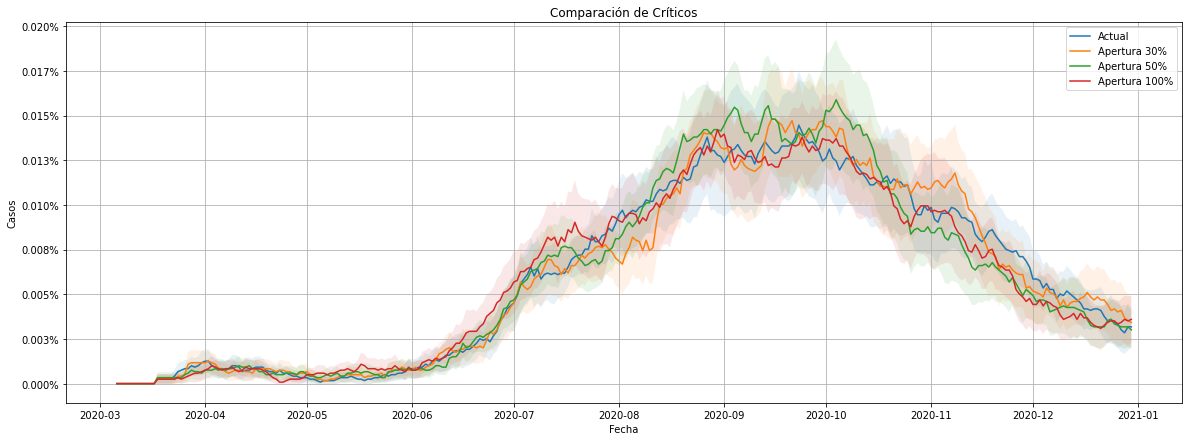

In [30]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( series1_grouped.index, series1_grouped[ 'Críticos_mean' ], label = 'Actual' )
ax.fill_between( series1_grouped.index, ( series1_grouped[ 'Críticos_mean' ] - series1_grouped[ 'Críticos_ci' ] ), ( series1_grouped[ 'Críticos_mean' ] + series1_grouped[ 'Críticos_ci' ] ), alpha = .1 )

#ax.plot( series2_grouped.index, series2_grouped[ 'Críticos_mean' ], label = 'Sin cuarentena' )
#ax.fill_between( series2_grouped.index, ( series2_grouped[ 'Críticos_mean' ] - series2_grouped[ 'Críticos_ci' ] ), ( series2_grouped[ 'Críticos_mean' ] + series2_grouped[ 'Críticos_ci' ] ), alpha = .1 )

ax.plot( series3_grouped.index, series3_grouped[ 'Críticos_mean' ], label = 'Apertura 30%' )
ax.fill_between( series3_grouped.index, ( series3_grouped[ 'Críticos_mean' ] - series3_grouped[ 'Críticos_ci' ] ), ( series3_grouped[ 'Críticos_mean' ] + series3_grouped[ 'Críticos_ci' ] ), alpha = .1 )

ax.plot( series4_grouped.index, series4_grouped[ 'Críticos_mean' ], label = 'Apertura 50%' )
ax.fill_between( series4_grouped.index, ( series4_grouped[ 'Críticos_mean' ] - series4_grouped[ 'Críticos_ci' ] ), ( series4_grouped[ 'Críticos_mean' ] + series4_grouped[ 'Críticos_ci' ] ), alpha = .1 )

ax.plot( series5_grouped.index, series5_grouped[ 'Críticos_mean' ], label = 'Apertura 100%' )
ax.fill_between( series5_grouped.index, ( series5_grouped[ 'Críticos_mean' ] - series5_grouped[ 'Críticos_ci' ] ), ( series5_grouped[ 'Críticos_mean' ] + series5_grouped[ 'Críticos_ci' ] ), alpha = .1 )

ax.set_yticklabels( [ '{:,.3%}'.format( x ) for x in ax.get_yticks() ] )

plt.title( 'Comparación de Críticos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Casos' )
plt.grid( True )
plt.legend()

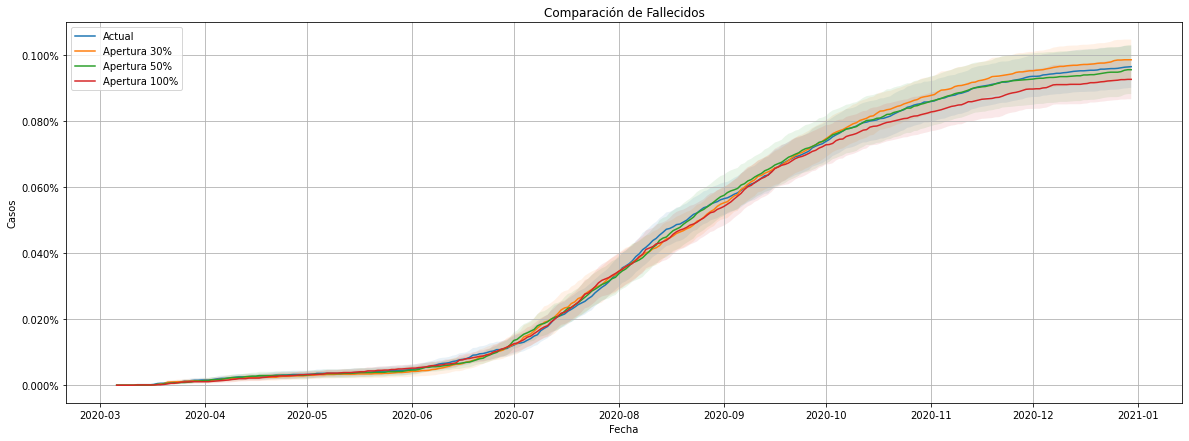

In [31]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( series1_grouped.index, series1_grouped[ 'Fallecidos_mean' ], label = 'Actual' )
ax.fill_between( series1_grouped.index, ( series1_grouped[ 'Fallecidos_mean' ] - series1_grouped[ 'Fallecidos_ci' ] ), ( series1_grouped[ 'Fallecidos_mean' ] + series1_grouped[ 'Fallecidos_ci' ] ), alpha = .1 )

#ax.plot( series2_grouped.index, series2_grouped[ 'Fallecidos_mean' ], label = 'Sin cuarentena' )
#ax.fill_between( series2_grouped.index, ( series2_grouped[ 'Fallecidos_mean' ] - series2_grouped[ 'Fallecidos_ci' ] ), ( series2_grouped[ 'Fallecidos_mean' ] + series2_grouped[ 'Fallecidos_ci' ] ), alpha = .1 )

ax.plot( series3_grouped.index, series3_grouped[ 'Fallecidos_mean' ], label = 'Apertura 30%' )
ax.fill_between( series3_grouped.index, ( series3_grouped[ 'Fallecidos_mean' ] - series3_grouped[ 'Fallecidos_ci' ] ), ( series3_grouped[ 'Fallecidos_mean' ] + series3_grouped[ 'Fallecidos_ci' ] ), alpha = .1 )

ax.plot( series4_grouped.index, series4_grouped[ 'Fallecidos_mean' ], label = 'Apertura 50%' )
ax.fill_between( series4_grouped.index, ( series4_grouped[ 'Fallecidos_mean' ] - series4_grouped[ 'Fallecidos_ci' ] ), ( series4_grouped[ 'Fallecidos_mean' ] + series4_grouped[ 'Fallecidos_ci' ] ), alpha = .1 )

ax.plot( series5_grouped.index, series5_grouped[ 'Fallecidos_mean' ], label = 'Apertura 100%' )
ax.fill_between( series5_grouped.index, ( series5_grouped[ 'Fallecidos_mean' ] - series5_grouped[ 'Fallecidos_ci' ] ), ( series5_grouped[ 'Fallecidos_mean' ] + series5_grouped[ 'Fallecidos_ci' ] ), alpha = .1 )

ax.set_yticklabels( [ '{:,.3%}'.format( x ) for x in ax.get_yticks() ] )

plt.title( 'Comparación de Fallecidos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Casos' )
plt.grid( True )
plt.legend()

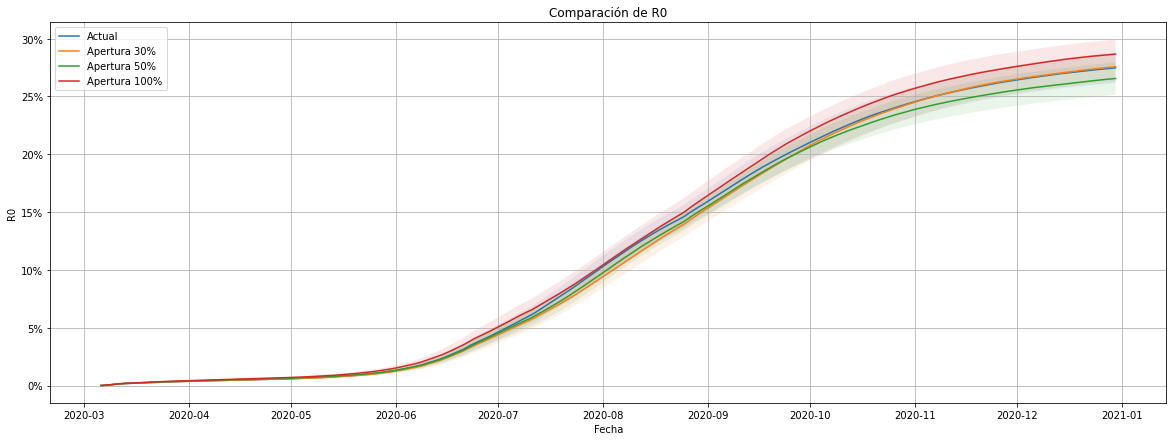

In [32]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( series1_grouped.index, series1_grouped[ 'R0_mean' ], label = 'Actual' )
ax.fill_between( series1_grouped.index, ( series1_grouped[ 'R0_mean' ] - series1_grouped[ 'R0_ci' ] ), ( series1_grouped[ 'R0_mean' ] + series1_grouped[ 'R0_ci' ] ), alpha = .1 )

#ax.plot( series2_grouped.index, series2_grouped[ 'R0_mean' ], label = 'Sin cuarentena' )
#ax.fill_between( series2_grouped.index, ( series2_grouped[ 'R0_mean' ] - series2_grouped[ 'R0_ci' ] ), ( series2_grouped[ 'R0_mean' ] + series2_grouped[ 'R0_ci' ] ), alpha = .1 )

ax.plot( series3_grouped.index, series3_grouped[ 'R0_mean' ], label = 'Apertura 30%' )
ax.fill_between( series3_grouped.index, ( series3_grouped[ 'R0_mean' ] - series3_grouped[ 'R0_ci' ] ), ( series3_grouped[ 'R0_mean' ] + series3_grouped[ 'R0_ci' ] ), alpha = .1 )

ax.plot( series4_grouped.index, series4_grouped[ 'R0_mean' ], label = 'Apertura 50%' )
ax.fill_between( series4_grouped.index, ( series4_grouped[ 'R0_mean' ] - series4_grouped[ 'R0_ci' ] ), ( series4_grouped[ 'R0_mean' ] + series4_grouped[ 'R0_ci' ] ), alpha = .1 )

ax.plot( series5_grouped.index, series5_grouped[ 'R0_mean' ], label = 'Apertura 100%' )
ax.fill_between( series5_grouped.index, ( series5_grouped[ 'R0_mean' ] - series5_grouped[ 'R0_ci' ] ), ( series5_grouped[ 'R0_mean' ] + series5_grouped[ 'R0_ci' ] ), alpha = .1 )

ax.set_yticklabels( [ '{:,.0%}'.format( x ) for x in ax.get_yticks() ] )

plt.title( 'Comparación de R0' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'R0' )
plt.grid( True )
plt.legend()

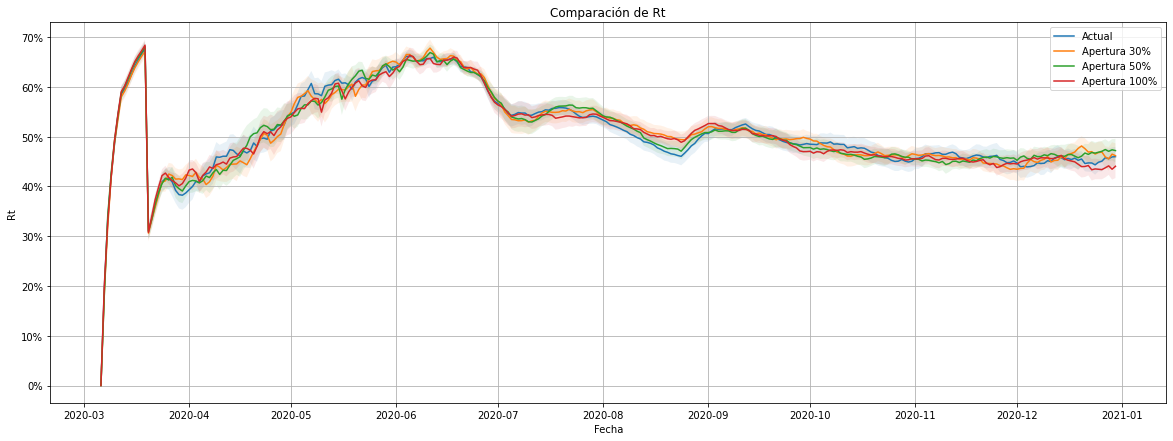

In [33]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( series1_grouped.index, series1_grouped[ 'Rt_mean' ], label = 'Actual' )
ax.fill_between( series1_grouped.index, ( series1_grouped[ 'Rt_mean' ] - series1_grouped[ 'Rt_ci' ] ), ( series1_grouped[ 'Rt_mean' ] + series1_grouped[ 'Rt_ci' ] ), alpha = .1 )

#ax.plot( series2_grouped.index, series2_grouped[ 'Rt_mean' ], label = 'Sin cuarentena' )
#ax.fill_between( series2_grouped.index, ( series2_grouped[ 'Rt_mean' ] - series2_grouped[ 'Rt_ci' ] ), ( series2_grouped[ 'Rt_mean' ] + series2_grouped[ 'Rt_ci' ] ), alpha = .1 )

ax.plot( series3_grouped.index, series3_grouped[ 'Rt_mean' ], label = 'Apertura 30%' )
ax.fill_between( series3_grouped.index, ( series3_grouped[ 'Rt_mean' ] - series3_grouped[ 'Rt_ci' ] ), ( series3_grouped[ 'Rt_mean' ] + series3_grouped[ 'Rt_ci' ] ), alpha = .1 )

ax.plot( series4_grouped.index, series4_grouped[ 'Rt_mean' ], label = 'Apertura 50%' )
ax.fill_between( series4_grouped.index, ( series4_grouped[ 'Rt_mean' ] - series4_grouped[ 'Rt_ci' ] ), ( series4_grouped[ 'Rt_mean' ] + series4_grouped[ 'Rt_ci' ] ), alpha = .1 )

ax.plot( series5_grouped.index, series5_grouped[ 'Rt_mean' ], label = 'Apertura 100%' )
ax.fill_between( series5_grouped.index, ( series5_grouped[ 'Rt_mean' ] - series5_grouped[ 'Rt_ci' ] ), ( series5_grouped[ 'Rt_mean' ] + series5_grouped[ 'Rt_ci' ] ), alpha = .1 )

ax.set_yticklabels( [ '{:,.0%}'.format( x ) for x in ax.get_yticks() ] )

plt.title( 'Comparación de Rt' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Rt' )
plt.grid( True )
plt.legend()

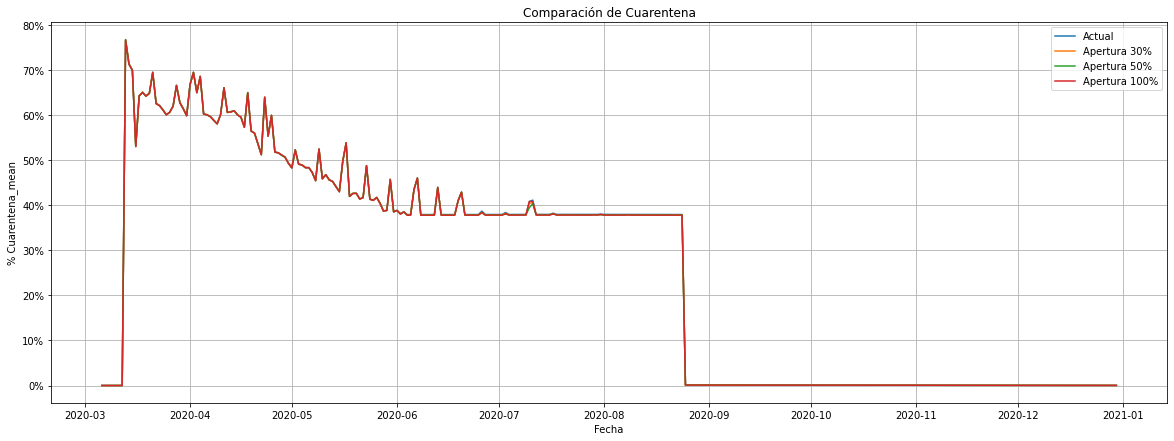

In [34]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( series1_grouped.index, series1_grouped[ 'Cuarentena_mean' ], label = 'Actual' )

#ax.plot( series2_grouped.index, series2_grouped[ 'Cuarentena_mean' ], label = 'Sin cuarentena' )

ax.plot( series3_grouped.index, series3_grouped[ 'Cuarentena_mean' ], label = 'Apertura 30%' )

ax.plot( series4_grouped.index, series4_grouped[ 'Cuarentena_mean' ], label = 'Apertura 50%' )

ax.plot( series5_grouped.index, series5_grouped[ 'Cuarentena_mean' ], label = 'Apertura 100%' )

ax.set_yticklabels( [ '{:,.0%}'.format( x ) for x in ax.get_yticks() ] )

plt.title( 'Comparación de Cuarentena' )
plt.xlabel( 'Fecha' )
plt.ylabel( '% Cuarentena_mean' )
plt.grid( True )
plt.legend()